# Семинар 1: основные понятия

Пусть задано вероятностное пространство $ (\Omega, \mathcal{F}, \mathbb{P}) $ и множество $ T \subseteq \mathbb{R} $.
Функция $ X \colon \Omega \times T \to \mathbb{R} $ называется **случайным процессом**, если $ \forall t \in T $ функция $ X(\cdot, t) \equiv X_t \colon \Omega \to \mathbb{R} $ измерима.
Случайный процесс можно трактовать как семейство случайных величин, параметризованное $ t \in T $.
Параметр $ t $ обычно интерпретируется как время.

## Реализации и сечения

При фиксированном $ t_0 \in T $ случайная величина $ X_{t_0} $ называется **сечением процесса** $ X $ в момент $ t_0 $.
При фиксированном $ \omega_0 \in \Omega $ функция $ X(\omega_0, \cdot) $ называется **реализацией процесса**.

Промоделируем несколько простейших случайных процессов.

In [1]:
import numpy as np

# Фиксируем зерно для генертора случайных чисел.
np.random.seed(seed=42)

In [2]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

font = {'size'   : 14}
matplotlib.rc('font', **font)

In [3]:
# Раскомментировать, если следующая ячейка не работает.
#import sys
#sys.path.insert(1, ".")

In [4]:
from utils.plots import plot_realizations, plot_slices, plot_correlation_function

### Пример № 1

Пусть $ \Omega = [-1; 1] $, $ \mathcal{F} $ - $ \sigma $-алгебра измеримых по Лебегу множеств на отрезке $ [-1; 1] $, $ \mathbb{P} $ соответствует равномерному на $ [-1; 1] $ распределению, $ T = [0; +\infty) $.
Зададим $ X(\omega, t) = \omega \cdot t $.
Тогда реализации процесса будут прямыми, проходящими через ноль, с угловыми коэффициентами от $ -1 $ до $ 1 $, а сечения - случайные величины, равномерно распределённые по отрезку $ [-t; t] $.

In [5]:
from scipy.stats import uniform

In [6]:
def generate_sp_example_1(T, realizations_number=25):
    """
    Сгенерировать realizations_number реализаций случайного процесса из примера №1.
    """
    
    omegas = uniform(loc=-1.0, scale=2.0).rvs(size=(realizations_number,1))
    realizations = omegas * T
    
    return realizations

In [7]:
T_example_1 = np.linspace(0.0, 3.0, 100)
sp_example_1_realizations = generate_sp_example_1(T_example_1)

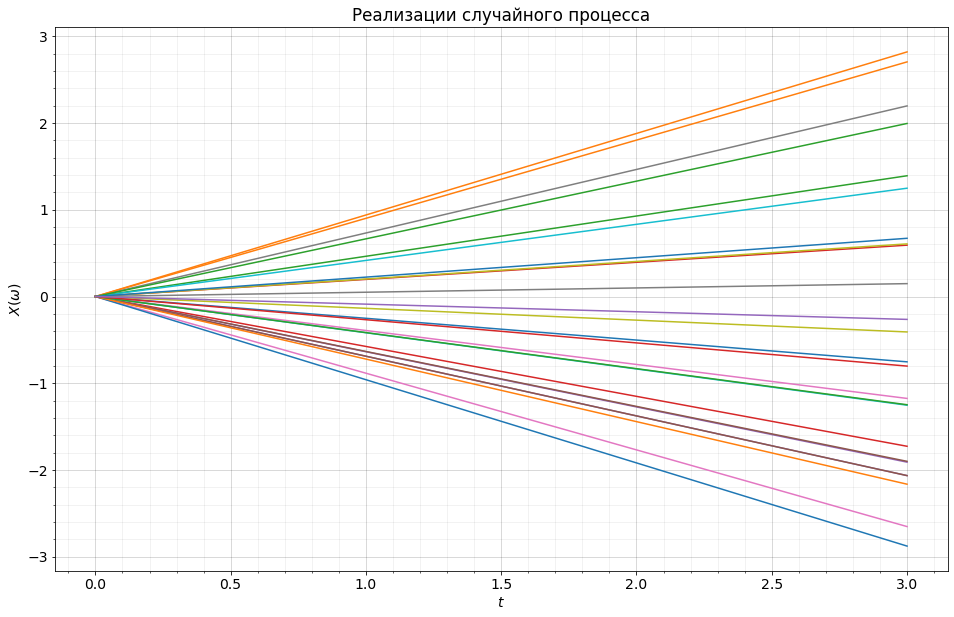

In [8]:
plot_realizations(T_example_1, sp_example_1_realizations)

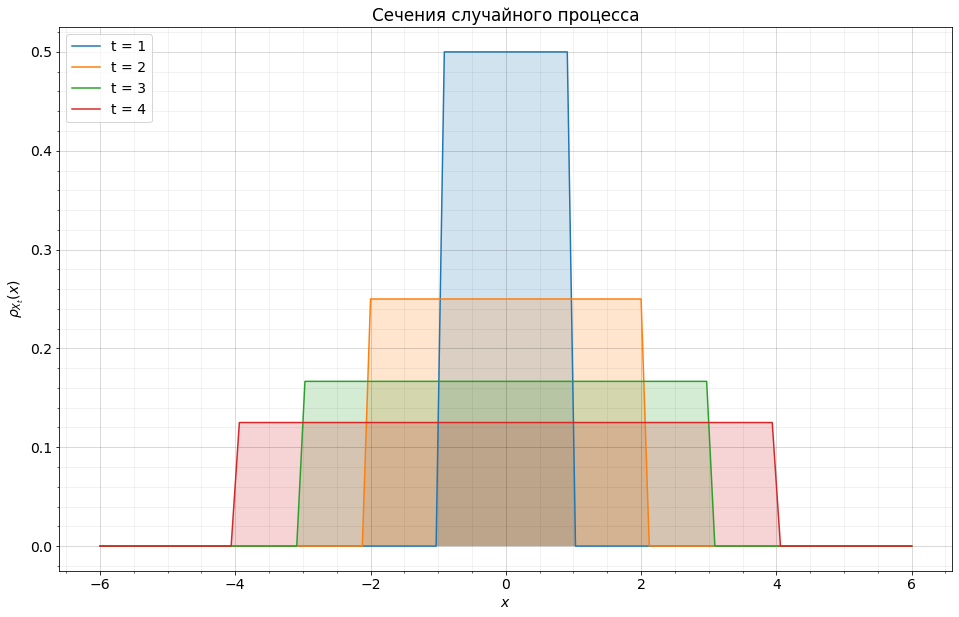

In [9]:
plot_slices(np.linspace(-6, 6, 100), [(uniform(loc=-t, scale=2.0 * t), f"t = {t}") for t in range(1,5)])

Это довольно простой процесс: вся случайность "зашита" в первые моменты времени; $ X(t + \Delta t) $ однозначно определяется по $ X(t) $ ($ t > 0 $).

### Пример № 2

Рассмотрим теперь следующий процесс: каждую секунду подбрасывается симметричная монетка, и, в зависимости от исхода, $ X(t) $ принимает значение либо $ 0 $, либо $ 1 $.

In [10]:
from scipy.stats import bernoulli

In [11]:
def generate_sp_example_2(T, realizations_number=5):
    """
    Сгенерировать realizations_number реализаций случайного процесса из примера №2.
    """
    
    assert (T >= 0.0).all()
    
    n_seconds = int(np.ceil(max(T))) + 1
    results = bernoulli(p=0.5).rvs(size=(realizations_number,n_seconds))
    realizations = results[:,np.floor(T).astype(np.int64)]
    
    return realizations

In [12]:
T_example_2 = np.linspace(0, 10, 11)
sp_example_2_realizations = generate_sp_example_2(T_example_2, 2)

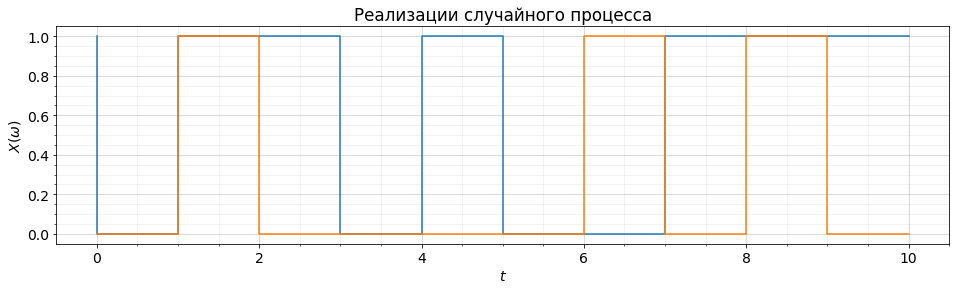

In [13]:
plot_realizations(T_example_2, sp_example_2_realizations, is_discrete=True, height=4)

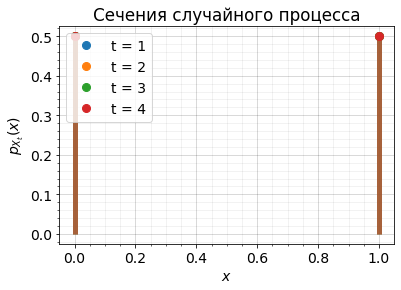

In [14]:
plot_slices(np.array([0, 1]), [(bernoulli(p=0.5), f"t = {t}") for t in range(1,5)], is_discrete=True, width=6, height=4)

Данный процесс обладает "короткой памятью": сечения, соответствующие разным секундам, друг от друга не зависят и имеют одинаковое распределение.

### Пример № 3

Наконец, рассмотрим случайный процесс посложнее.
Возьмём за основу предыдущий процесс, и определим $ X_t $ как число выпавших единиц к моменту времени $ t $.
Промоделируем несколько реализаций.

In [15]:
def generate_sp_example_3(T, realizations_number=25):
    """
    Сгенерировать realizations_number реализаций случайного процесса из примера №3.
    """
    
    assert (T >= 0.0).all()
    
    # Эта часть совпадает с примером №2: генерируем последовательность подбрасываний монет.
    n_seconds = int(np.ceil(max(T))) + 1
    results = bernoulli(p=0.5).rvs(size=(realizations_number,n_seconds))
    
    # Подсчёт накопленного к некоторой секунде результата.
    results = np.cumsum(results, axis=1) # Тут возникает биномиальное распределение.
    
    realizations = results[:,np.floor(T).astype(np.int64)]
    
    return realizations

In [16]:
T_example_3 = np.linspace(0, 60, 61)
sp_example_3_realizations = generate_sp_example_3(T_example_3)

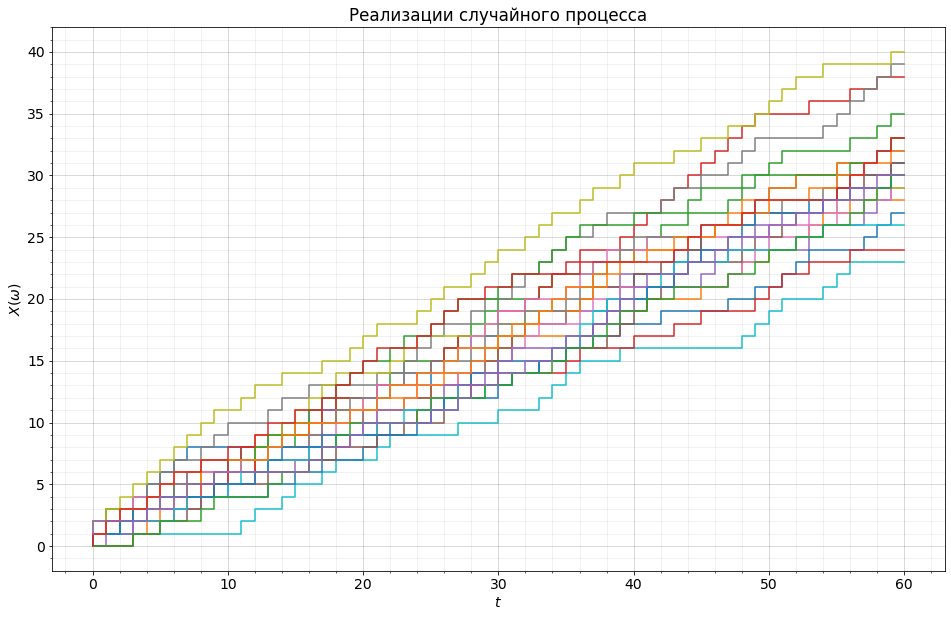

In [17]:
plot_realizations(T_example_3, sp_example_3_realizations, is_discrete=True)

In [18]:
from scipy.stats import binom

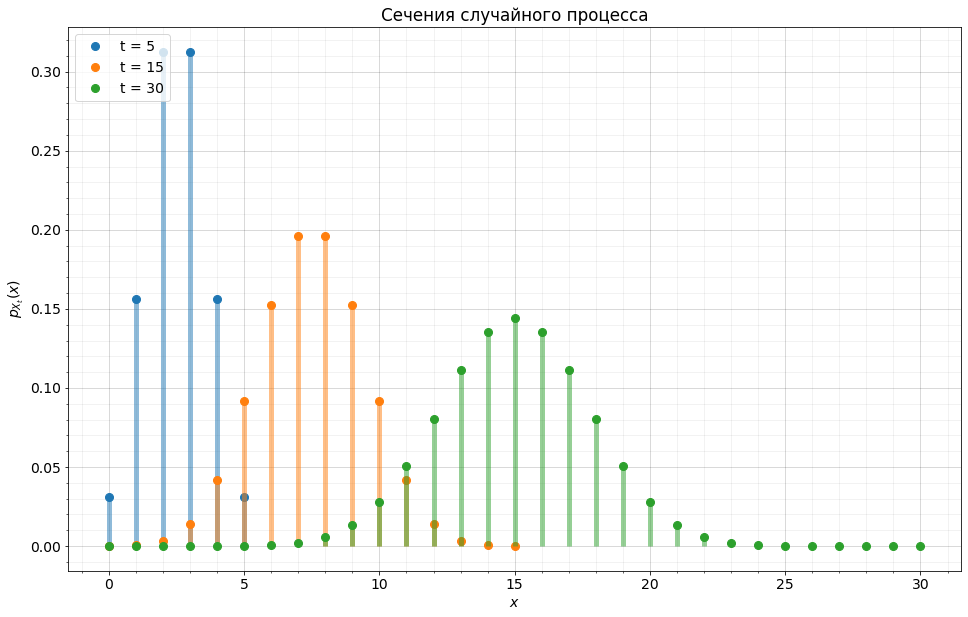

In [19]:
plot_slices(np.arange(0, 100), [(binom(n=int(t), p=0.5), f"t = {t}") for t in [5, 15, 30]], is_discrete=True)

К этому и подобным процессам мы еще вернёмся, когда будем исследовать случайные блуждания.

## Моменты случайного процесса

Если $ \forall t \in T $ существует $ \mathbb{E} X_t $,
то функция $ m_X(t) = \mathbb{E} X_t $ определена и называется **функцией среднего**.
Если $ \forall t_1, t_2 \in T $ существует $ \mathbb{E} X_{t_1} X_{t_2} $,
то функции $ K_X(t_1, t_2) = \mathbb{E} X_{t_1} X_{t_2} $ и $ R_X(t_1, t_2) = \mathbb{E} \mathring X_{t_1} \mathring X_{t_2} $
определены и называются, соответственно, **ковариационной** и **корреляционной функциями**.

Функции $ K_X(t_1, t_2) $ и $ R_X(t_1, t_2) $ одновременно либо определены, либо не определены,
причём в первом случае функция $ m_X(t) $ определена и $ R_X(t_1, t_2) = K_X(t_1, t_2) - m_X(t_1) m_X(t_2) $.

С использованием библиотеки `numpy` можно легко по набору реализаций посчитать оценки данных функций:
достаточно воспользоваться `mean` и `cov`.
Продемонстрируем это на примере случайного процесса №3.

In [20]:
sp_example_3_mean = np.mean(sp_example_3_realizations, axis=0)      # Значения функции среднего.
sp_example_3_cov  = np.cov(sp_example_3_realizations, rowvar=False) # Значения корреляционной функции (не перепутайте!)

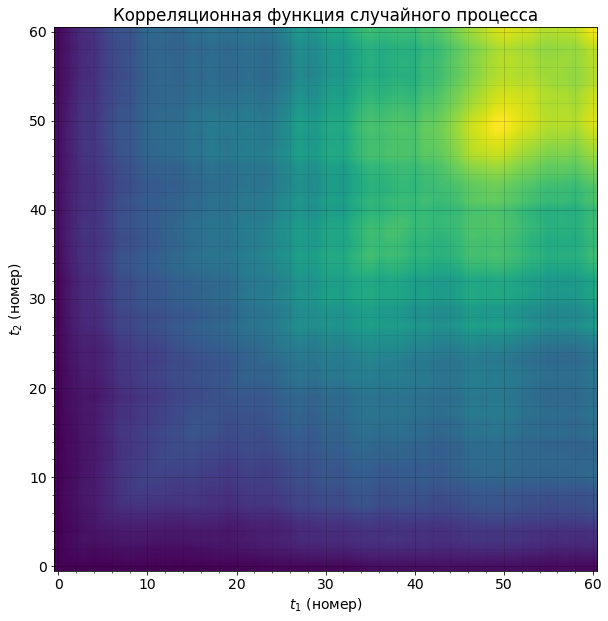

In [21]:
plot_correlation_function(T_example_3, sp_example_3_realizations)

Можно также отнормировать корреляционную функцию на корень из произведения дисперсий соответствующих сечений и получить **функцию коэффициента корреляции**:
$$
    r_X(t_1, t_2) = \frac{R_X(t_1, t_2)}{\sqrt{R_X(t_1, t_1) \cdot R_X(t_2, t_2)}}
$$

Данная функция отражает степень детерминированности линейной связи между разными сечениями процесса.
Несложно показать, что $ r_X(t,t) \equiv 1 $, если определена.

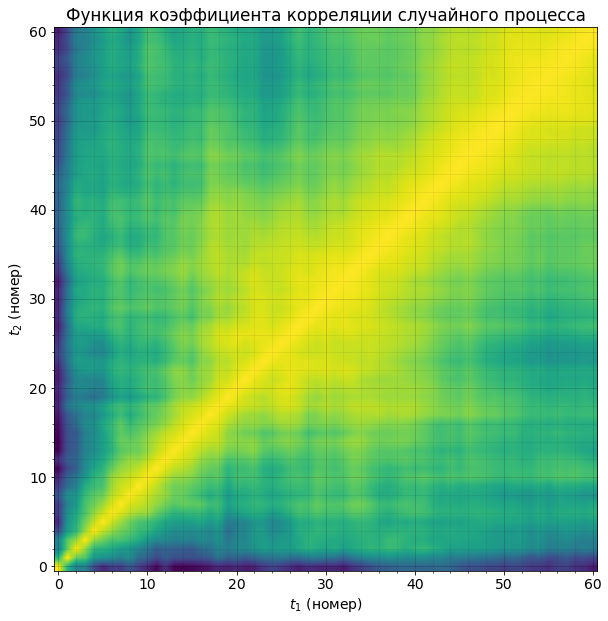

In [22]:
plot_correlation_function(T_example_3, sp_example_3_realizations, normalize=True)

Увеличение размера выборки реализаций сделает графики менее зашумлёнными.

## Примеры из семинарских задач

Промоделируем случайные процессы из некоторых примеров, разобранных на семинаре.
Все эти процессы построены на основе каких-то случайных величин ("скрытых параметров"),
а поэтому моделируются легко.

### Пример из задачи № 2

$$
    \eta \sim U_{[0;1]}, \quad X_t = \mathbb{I}_{(-\infty; \eta]}(t)
$$

In [23]:
def generate_sp_text_exercise_2(T, realizations_number=5):
    """
    Сгенерировать realizations_number реализаций случайного процесса из текстовой задачи №2.
    """
    
    results = uniform().rvs(size=(realizations_number,1))
    realizations = (T < results)
    
    return realizations

In [24]:
T_text_exercise_2 = np.linspace(-0.1, 1.1, 200)
sp_text_exercise_2_realizations = generate_sp_text_exercise_2(T_text_exercise_2)

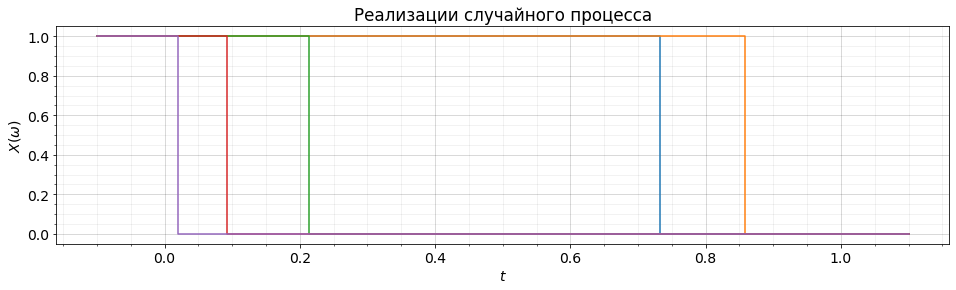

In [25]:
plot_realizations(T_text_exercise_2, sp_text_exercise_2_realizations, is_discrete=True, height=4)

### Пример из задачи № 5

$$
    \xi \sim \mathcal{N}(0,1), \quad \eta \sim U_{[-\pi; \pi]}, \quad X_t = \xi \cdot \cos(t + \eta)
$$

In [26]:
from scipy.stats import norm

In [27]:
def generate_sp_text_exercise_5(T, realizations_number=5):
    """
    Сгенерировать realizations_number реализаций случайного процесса из текстовой задачи №5.
    """
    
    magnitude = norm().rvs(size=(realizations_number,1))
    phase = uniform(loc=-np.pi, scale=2.0*np.pi).rvs(size=(realizations_number,1))
    realizations = magnitude * np.cos(T + phase)
    
    return realizations

In [28]:
T_text_exercise_5 = np.linspace(0.0, 5.0, 100)
sp_text_exercise_5_realizations = generate_sp_text_exercise_5(T_text_exercise_5)

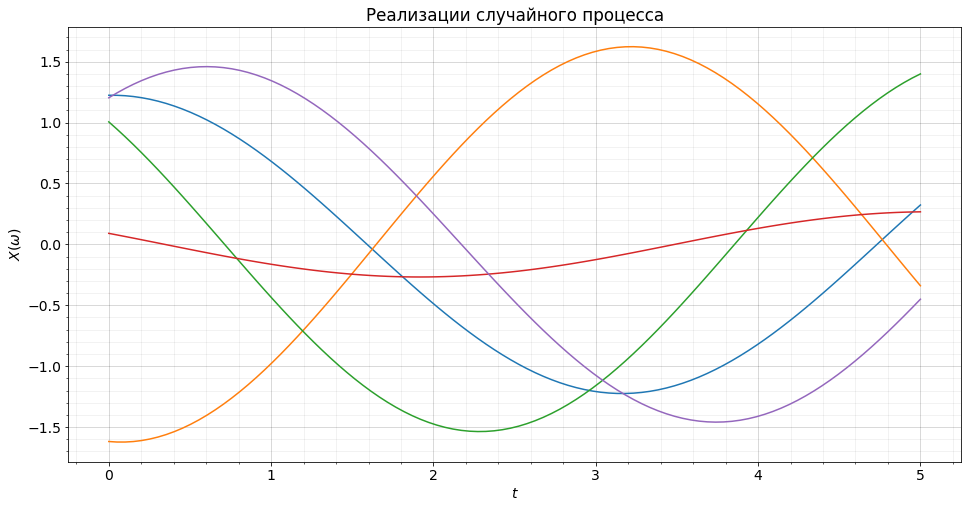

In [29]:
plot_realizations(T_text_exercise_5, sp_text_exercise_5_realizations, height=8)